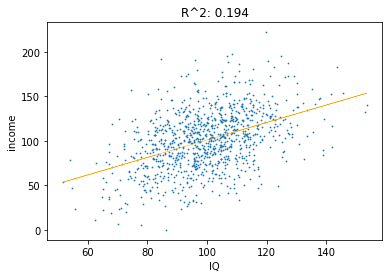

In [1]:
# ### Lab07
# ### 2021-10-14
# ### Regression

import numpy as np # load numpy
import matplotlib.pyplot as plt  

#%% 1) Simple linear regression between IQ and income

# 0. Load:
data = np.genfromtxt('iqIncome.csv',delimiter=',') # Column 1 = IQ, 2 = income

# 1. Descriptives:
D1 = np.mean(data,axis=0) # take mean of each column
D2 = np.median(data,axis=0) # take median of each column
D3 = np.std(data,axis=0) # take std of each column
D4 = np.corrcoef(data[:,0],data[:,1]) # pearson r = 0.44

# 2. Visualize:
plt.plot(data[:,0],data[:,1],'o',markersize=.75) # Plot IQ against income
plt.xlabel('IQ') 
plt.ylabel('income')  

# 3. Regression:
# By hand - also saved as a custom function that we will use later
regressContainer = np.empty([len(data),5]) # initialize empty container, 1000x5
regressContainer[:] = np.NaN # convert to NaN
for i in range(len(data)):
    regressContainer[i,0] = data[i,0] # IQ
    regressContainer[i,1] = data[i,1] # income
    regressContainer[i,2] = data[i,0]*data[i,1] # IQ * income
    regressContainer[i,3] = data[i,0]**2 # IQ squared
    regressContainer[i,4] = data[i,1]**2 # income squared
    
# Compute m ("slope"):
mNumerator = len(data)*sum(regressContainer[:,2]) - sum(regressContainer[:,0])*sum(regressContainer[:,1])
mDenominator = len(data)*sum(regressContainer[:,3]) - (sum(regressContainer[:,0]))**2
m = mNumerator/mDenominator

# Compute b ("y-intercept):
bNumerator = sum(regressContainer[:,1]) - m * sum(regressContainer[:,0])
bDenominator = len(data)
b = bNumerator/bDenominator
rSquared = D4[0,1]**2 

# 4. Add regression line to visualization:
yHat = m*data[:,0] + b # slope-intercept form, y = mx + b
plt.plot(data[:,0],yHat,color='orange',linewidth=0.5) # orange line for the fox
plt.title('R^2: {:.3f}'.format(rSquared)) # add title, r-squared rounded to nearest thousandth


#%% Custom SLR function
from simple_linear_regress_func import simple_linear_regress_func # import
output = simple_linear_regress_func(data) # return output (m,b,r^2) from input data
# We could also return the residuals, stats, etc.    

Text(0.5, 1.0, 'R^2: 0.478')

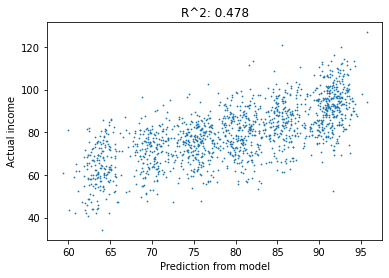

In [2]:
#%% 2) Multiple regression model
# Predicting income from IQ, hours worked and years formal education

# 0. Load:
data = np.genfromtxt('determinedIncome.csv',delimiter=',') # IQ, hours worked, years education, income

# 1. Descriptives:
D1 = np.mean(data,axis=0) # take mean of each column
D2 = np.median(data,axis=0) # take median of each column
D3 = np.std(data,axis=0) # take std of each column
D4 = np.corrcoef(data[:,0],data[:,1]) # correlate IQ and hours worked

# 2a. Model: IQ
dataInput = np.transpose([data[:,3],data[:,0]]) # array for income and IQ, transposed into columns
output = simple_linear_regress_func(dataInput) # run custom SLR function
rSqr = output[2] # 0.11 - not great

# 2b. Model: IQ and hours worked
from sklearn import linear_model # library for multiple linear regression
X = np.transpose([data[:,0],data[:,1]]) # IQ, hours worked
Y = data[:,3] # income
regr = linear_model.LinearRegression() # linearRegression function from linear_model
regr.fit(X,Y) # use fit method 
rSqr = regr.score(X,Y) # 0.265 - better

# 2c. Model: All factors
X = np.transpose([data[:,0],data[:,1],data[:,2]]) # IQ, hours worked, years education
Y = data[:,3] # income
regr = linear_model.LinearRegression() # linearRegression function from linear_model
regr.fit(X,Y) # use fit method 
rSqr = regr.score(X,Y) # 0.48 - realistic - life is quite idiosyncratic
betas = regr.coef_ # m
yInt = regr.intercept_  # b

# Visualize: actual vs. predicted income (from model)
y_hat = betas[0]*data[:,0] + betas[1]*data[:,1] + betas[2]*data[:,2] + yInt
plt.plot(y_hat,data[:,3],'o',markersize=.75) # y_hat, income
plt.xlabel('Prediction from model') 
plt.ylabel('Actual income')  
plt.title('R^2: {:.3f}'.format(rSqr)) 


Text(0, 0.5, 'Sum of squares')

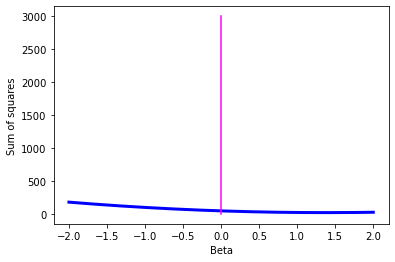

In [3]:
#%% 3) Explaing how beta is determined by "dropping marbles" - which beta is just right?

# Cover story: We want to optimize working conditions to maximize performance.
# Say we have an experiment with 3 trials - which is nice because two would
# be trivial and we can still visualize 3 dimensions
# We want to know how work performance is related to lighting (luminance) in a room
# This recalls the classic experiments that were conducted at the Hawthorne plant between 1924 and 1927 
# (See e.g. Levitt & List (2011) for a modern perspective on these illumination experiments)

xLuminance = np.array([1,2,3]) # A column vector of IV in cd/m^2
yPerformance = 1.5 * xLuminance + 0.5 + np.random.normal(0,1,len(xLuminance)) * 2 #A metric of performance

# Let's explore the space of betas
beta = 0 #Initialize somewhere
startExploration = beta - 2
endExploration = beta + 2
numBeta = 200
testBetas = np.linspace(startExploration,endExploration,numBeta) # 200 betas 
# between the actual beta and +/- 2. Let's just go through them and try them

distanceSum = np.empty([numBeta,1]) # Init container
distanceSum[:] = np.NaN # Convert to NaN
for ii in range(numBeta):
    prediction = testBetas[ii] * xLuminance # Do this numBeta times
    # We now need to introduce a distance metric
    # We start with sum of squares (the most commonly used)
    distanceSum[ii] = sum((prediction-yPerformance)**2) # Sum of squares
    # distanceSum[ii] = sum(prediction-yPerformance) # Simple summed deviations
    # distanceSum[ii] = sum(np.log(prediction-yPerformance)) # Absolute summed deviations
    
# Let's plot that  
plt.plot(testBetas,distanceSum,color='blue',linewidth=3)
# We also want to indicate with a line where the original beta was
plt.plot([beta,beta],[0,3000],color='magenta')
plt.xlabel('Beta')
plt.ylabel('Sum of squares')


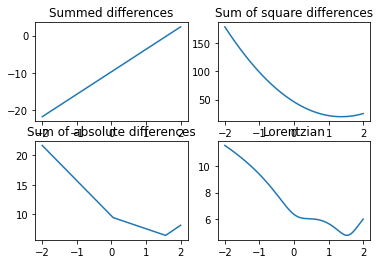

In [4]:
#%% 4) Going deeper into optimization - trying different metrics - 
# what is special about the sum of squared differences?

startExploration = beta - 2
endExploration = beta + 2
numBeta = 200
testBetas = np.linspace(startExploration,endExploration,numBeta)
distanceSum = np.empty([numBeta,4]) # Init container
distanceSum[:] = np.NaN # Convert to NaN

for ii in range(numBeta):
    prediction = testBetas[ii] * xLuminance
    distanceSum[ii,0] = sum(prediction-yPerformance) # Simple
    distanceSum[ii,1] = sum((prediction-yPerformance)**2) # Sum of squares
    distanceSum[ii,2] = sum(abs(prediction-yPerformance)) # Absolute value
    distanceSum[ii,3] = sum(np.log(1 + (prediction-yPerformance)**2)) # Lorentzian

for ii in range(int(np.size(distanceSum)/len(distanceSum))):
    plt.subplot(2,2,ii+1)
    plt.plot(testBetas,distanceSum[:,ii])
    if ii == 0:
        plt.title('Summed differences')
    elif ii == 1:
        plt.title('Sum of square differences')
    elif ii == 2:
        plt.title('Sum of absolute differences')
    else:
        plt.title('Lorentzian') 

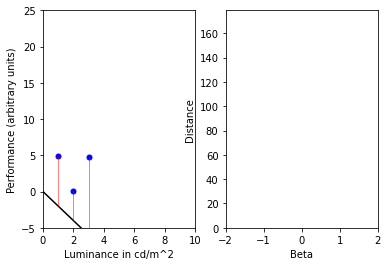

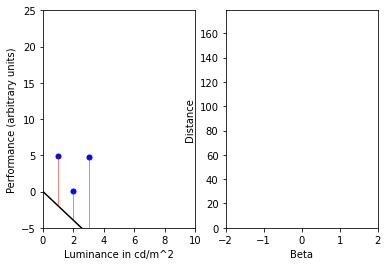

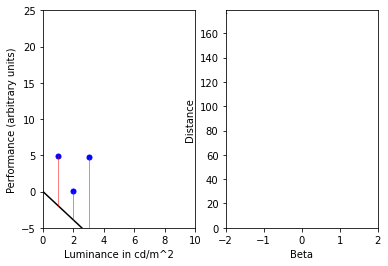

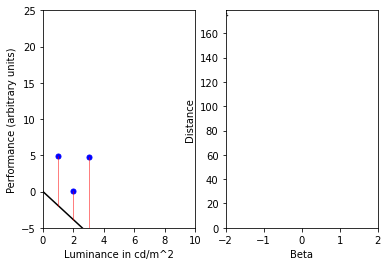

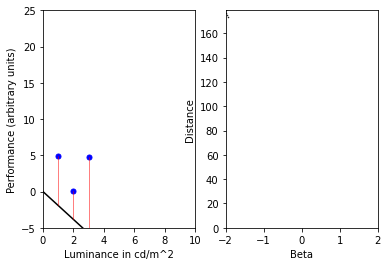

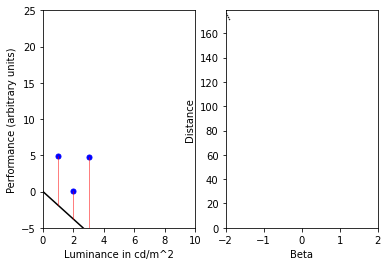

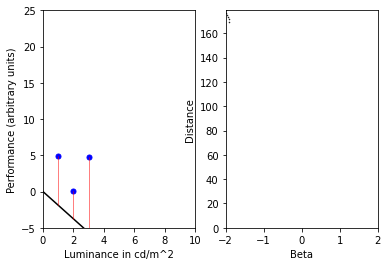

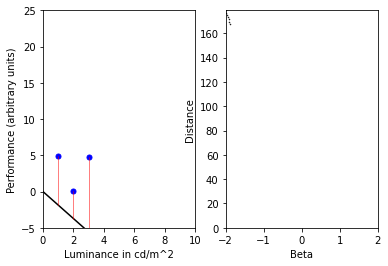

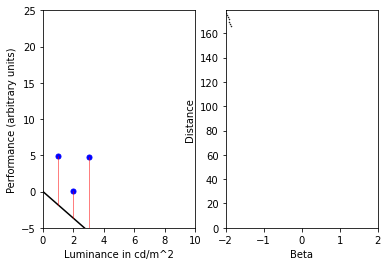

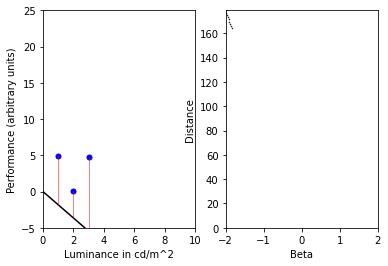

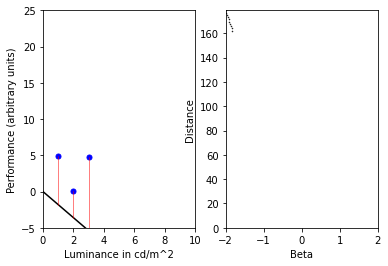

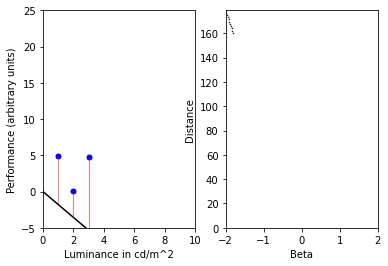

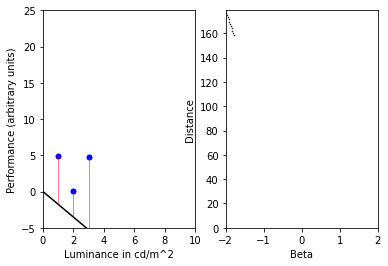

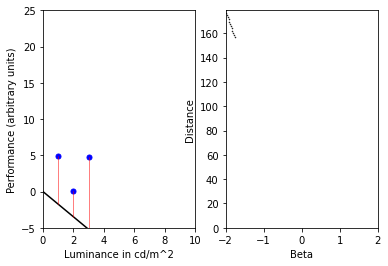

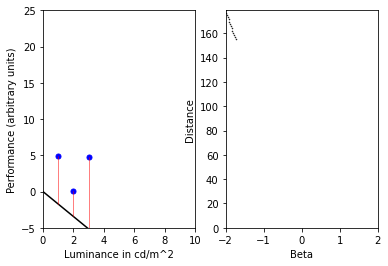

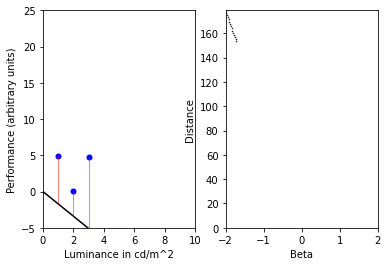

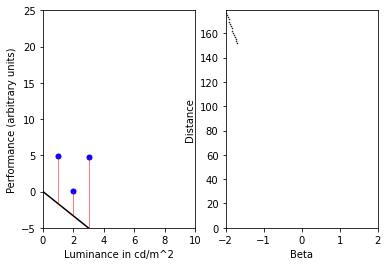

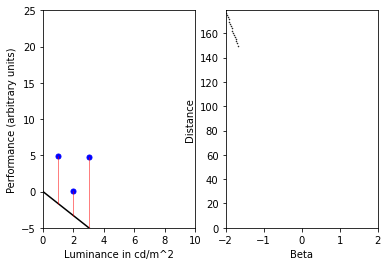

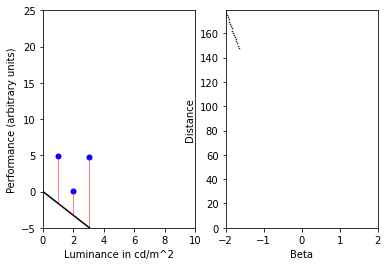

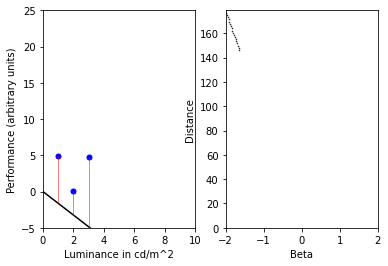

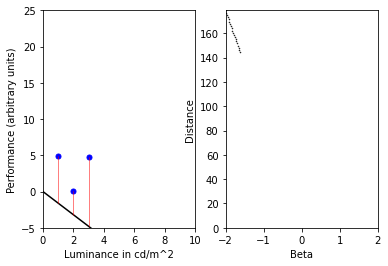

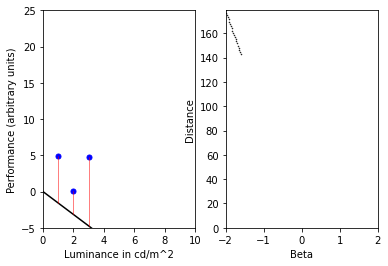

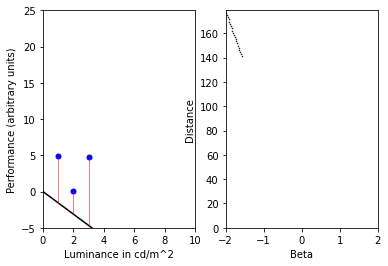

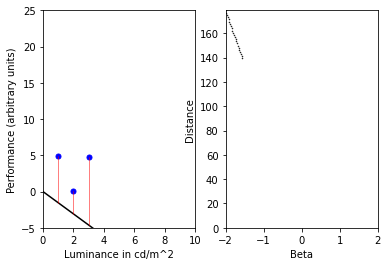

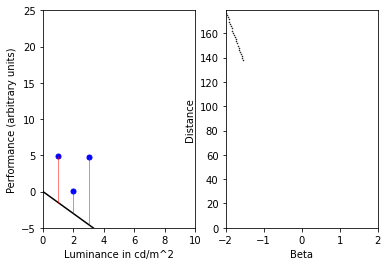

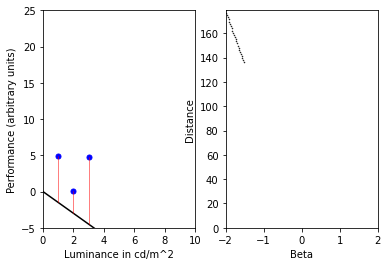

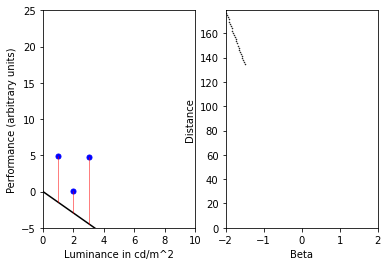

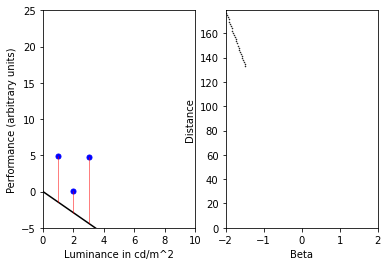

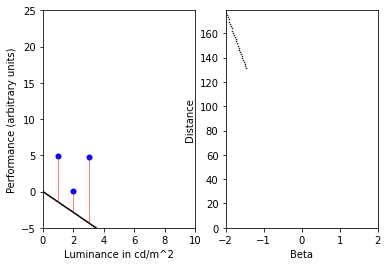

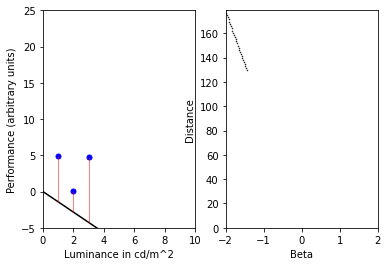

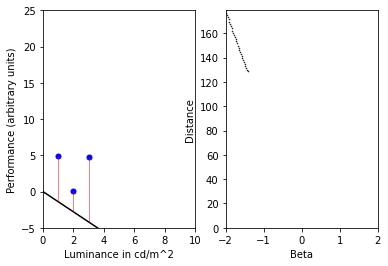

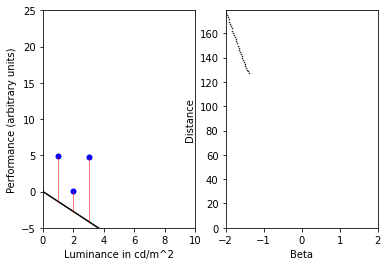

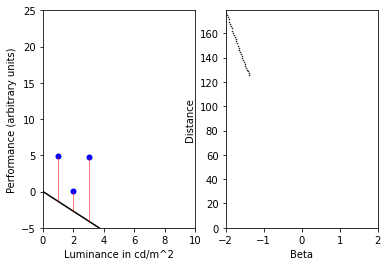

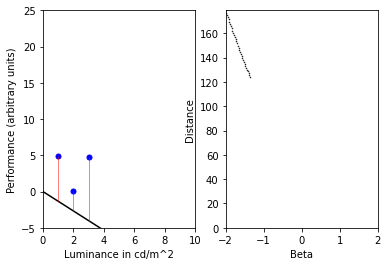

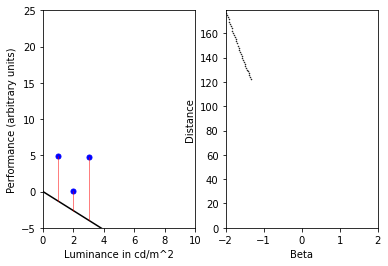

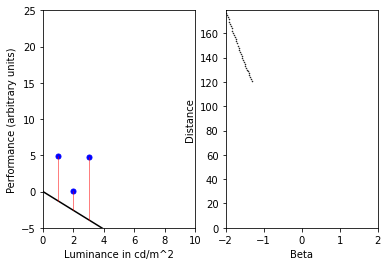

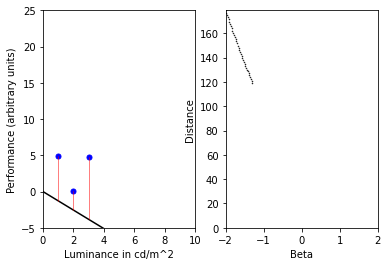

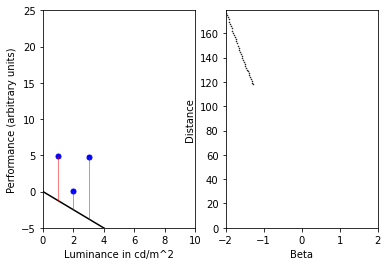

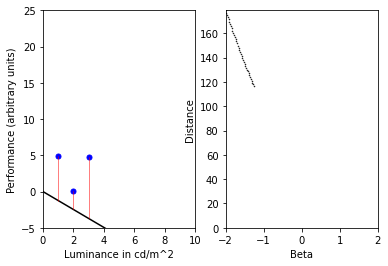

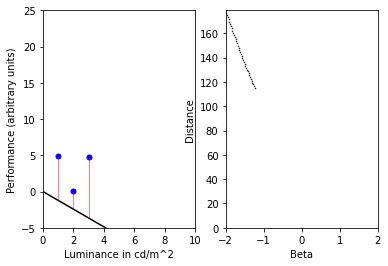

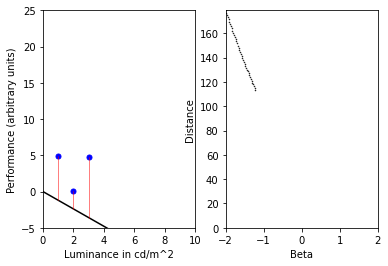

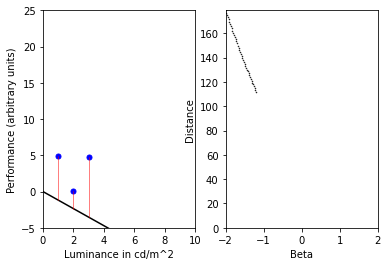

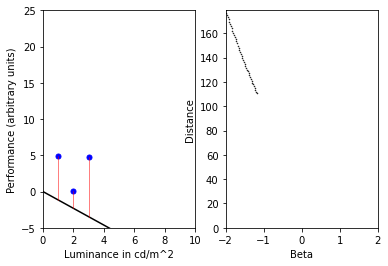

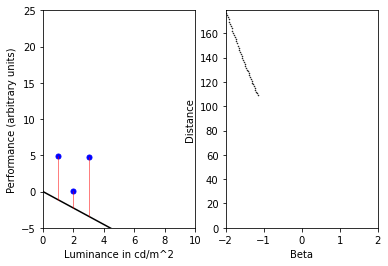

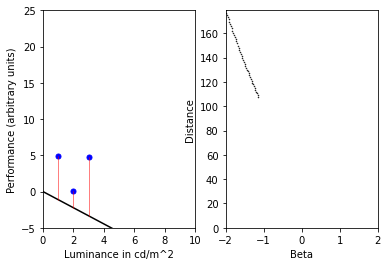

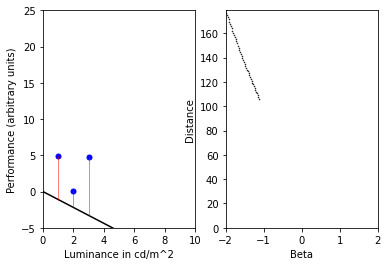

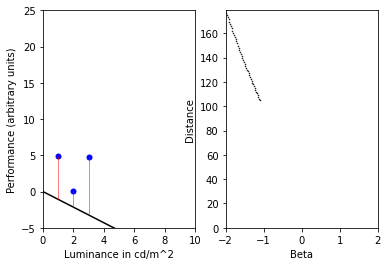

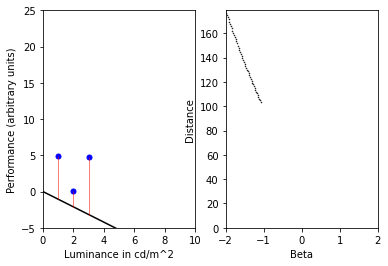

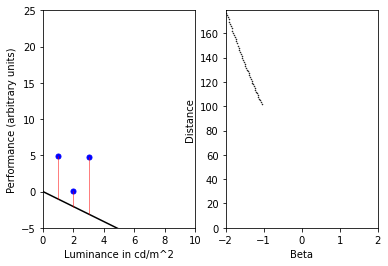

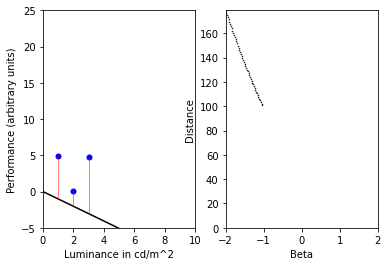

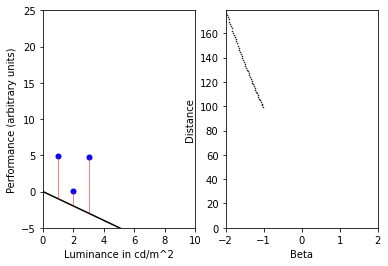

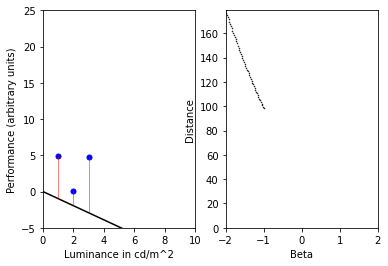

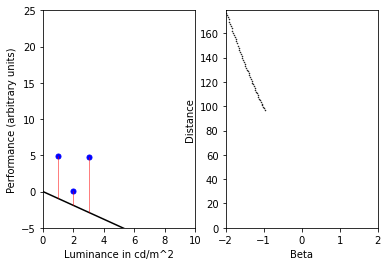

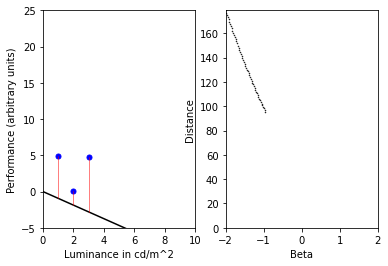

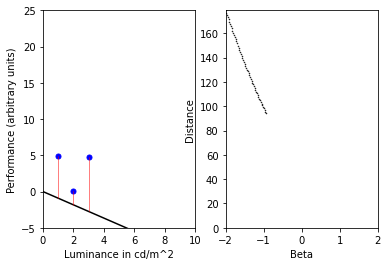

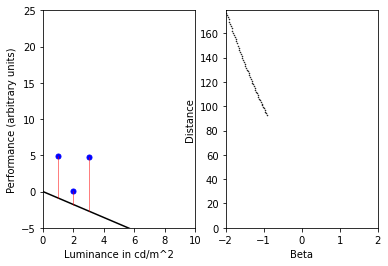

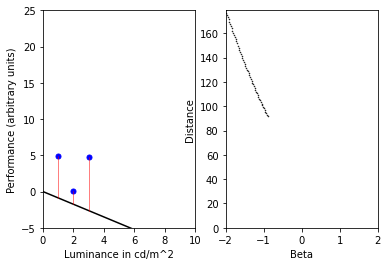

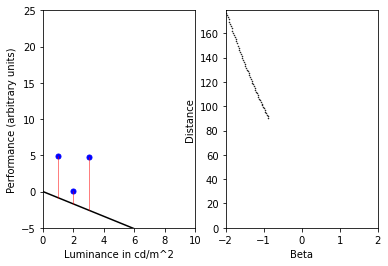

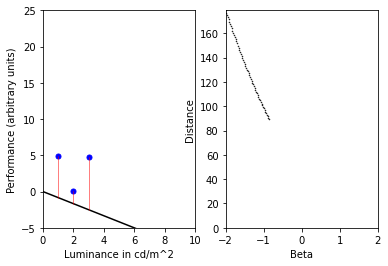

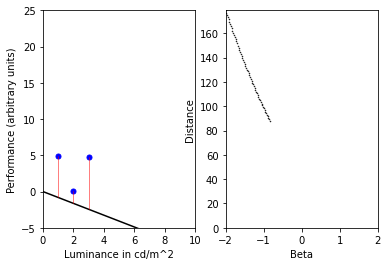

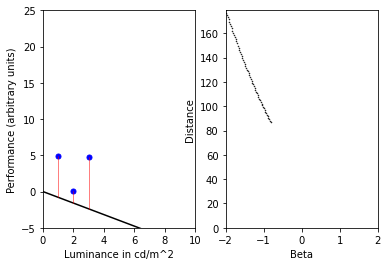

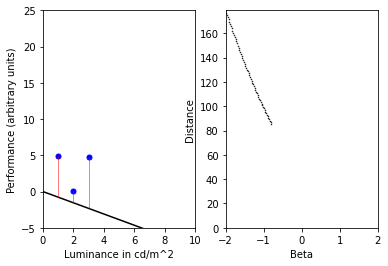

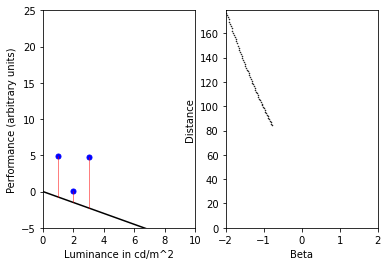

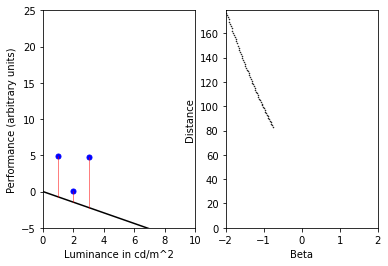

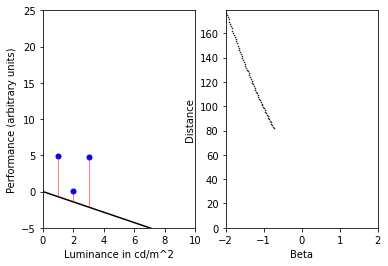

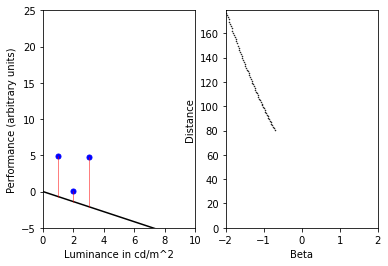

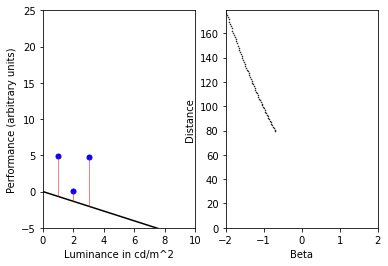

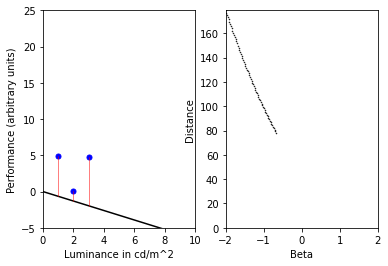

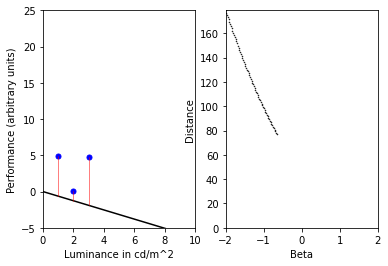

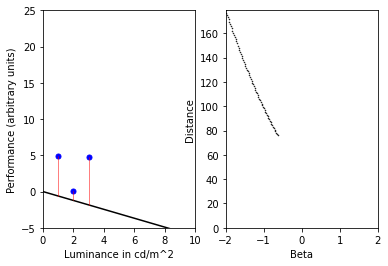

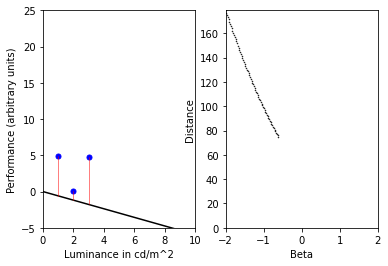

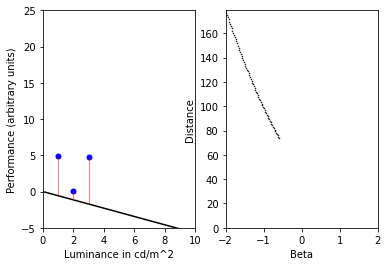

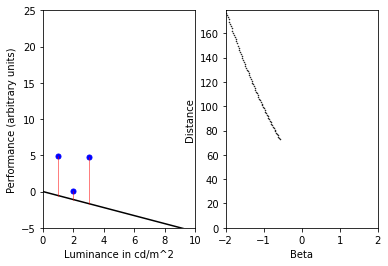

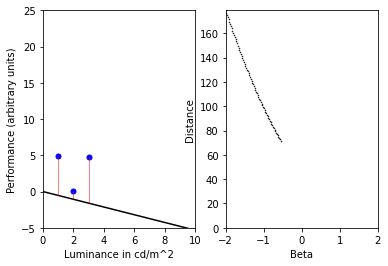

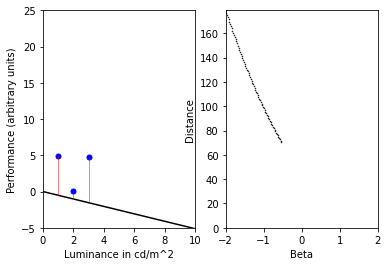

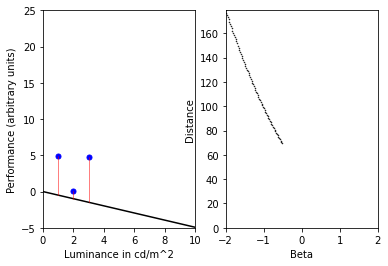

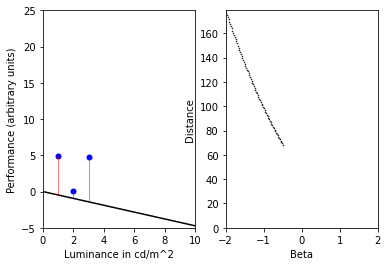

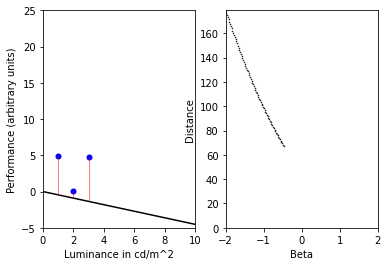

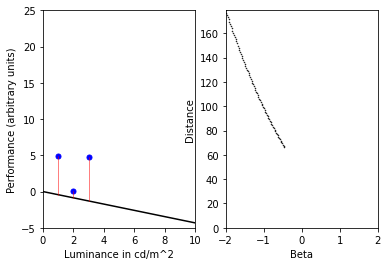

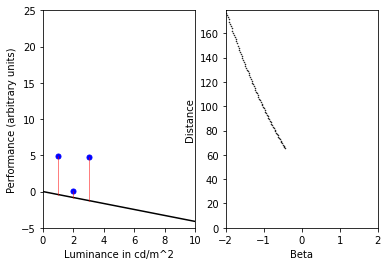

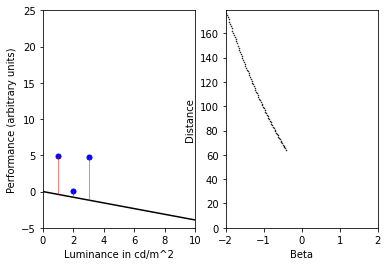

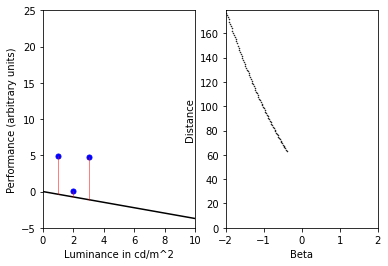

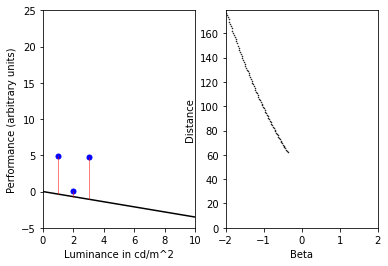

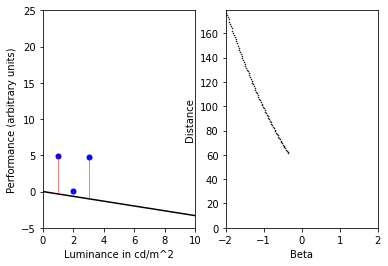

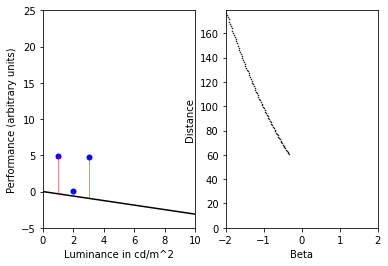

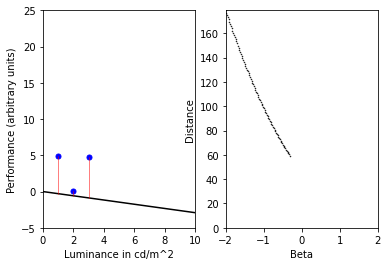

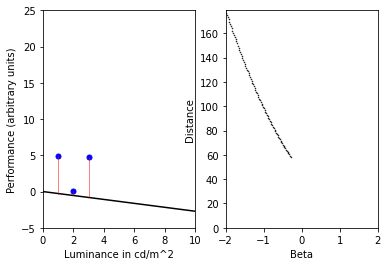

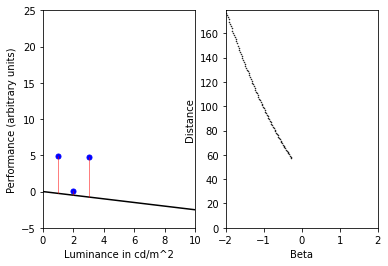

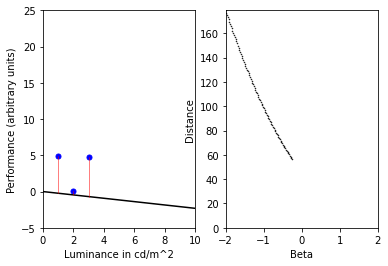

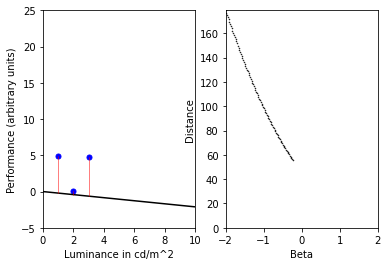

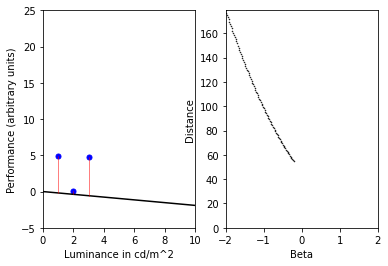

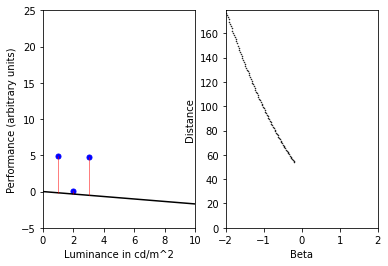

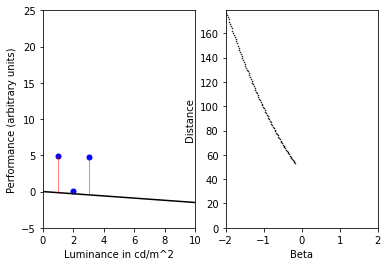

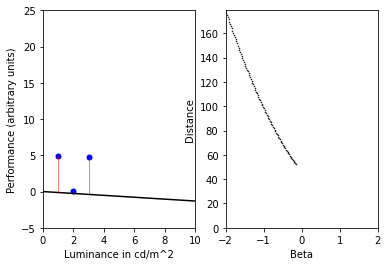

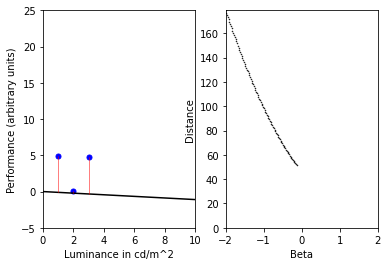

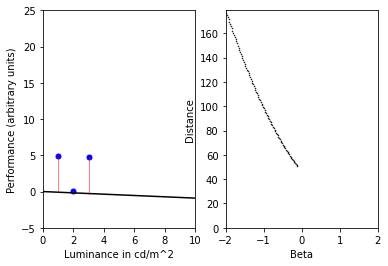

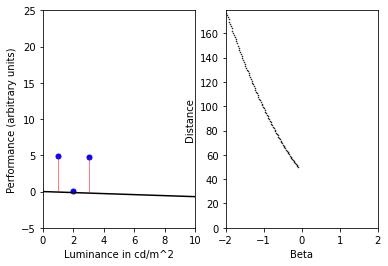

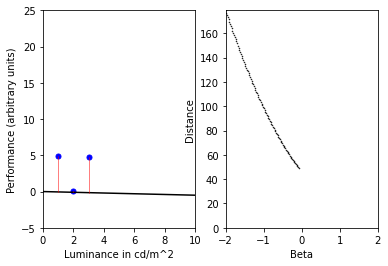

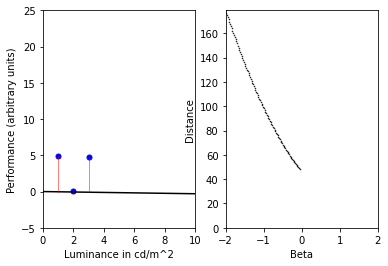

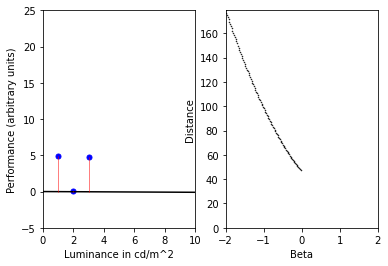

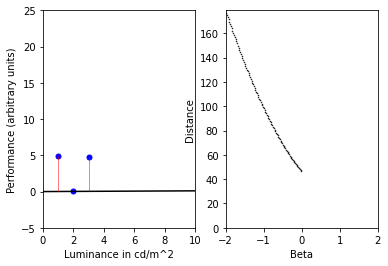

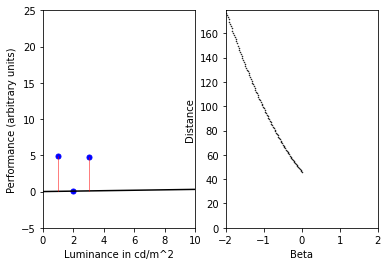

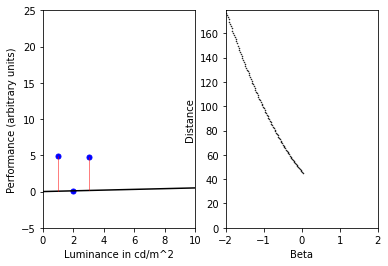

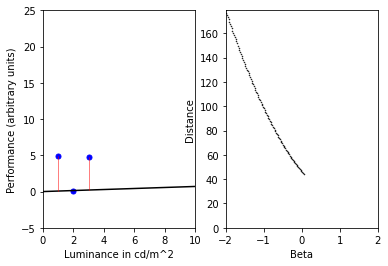

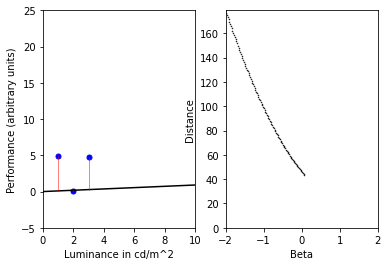

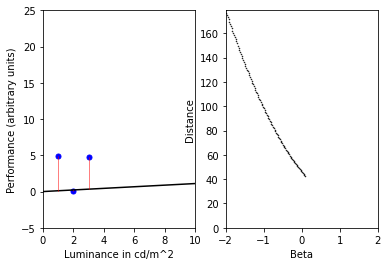

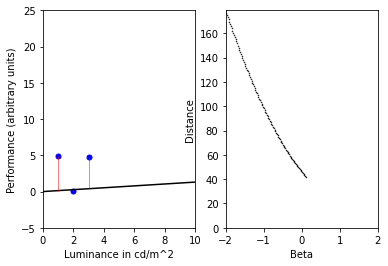

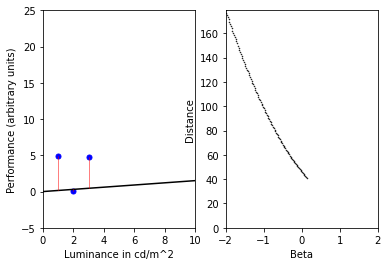

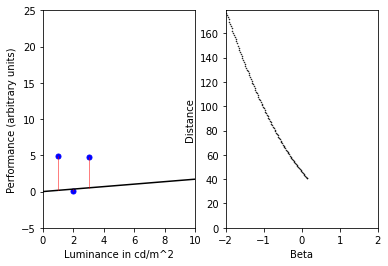

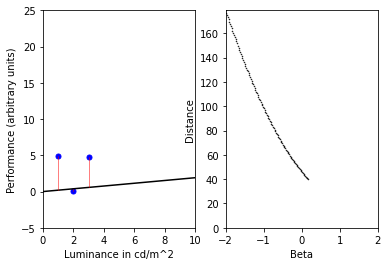

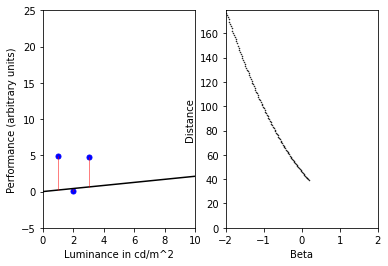

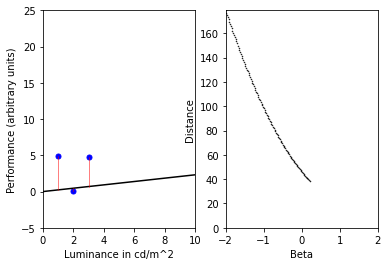

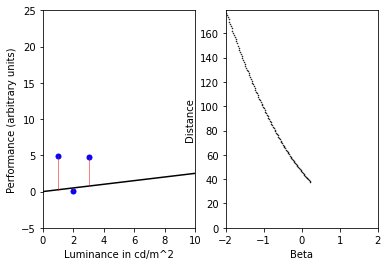

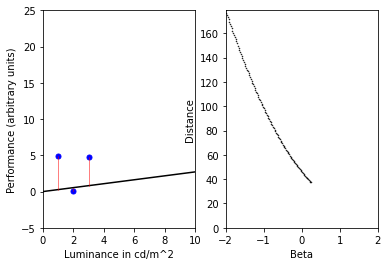

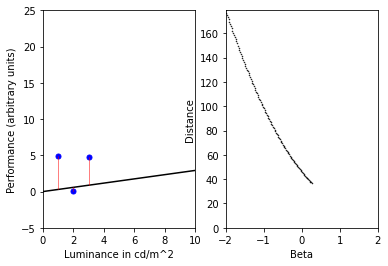

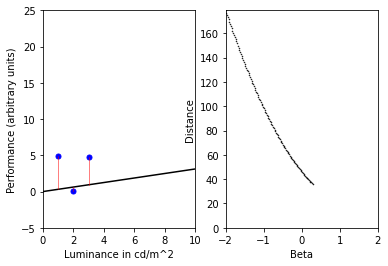

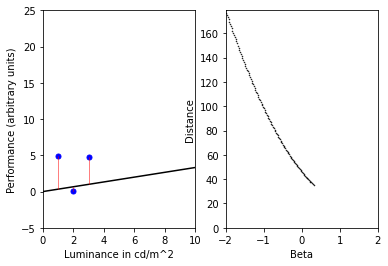

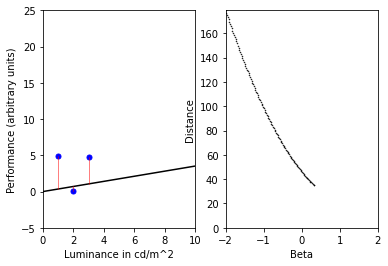

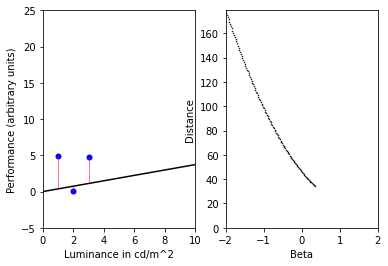

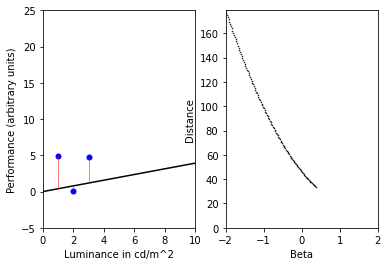

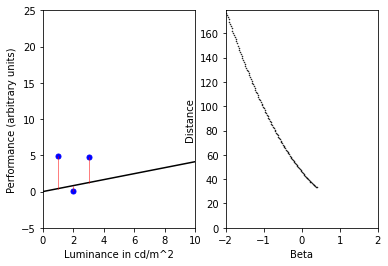

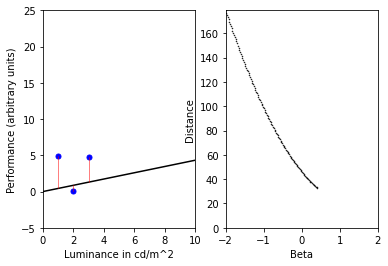

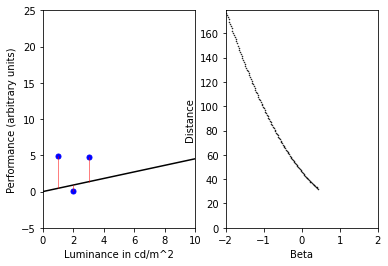

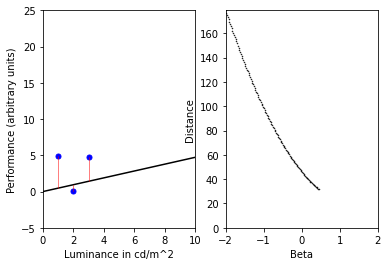

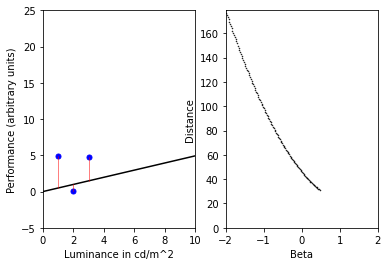

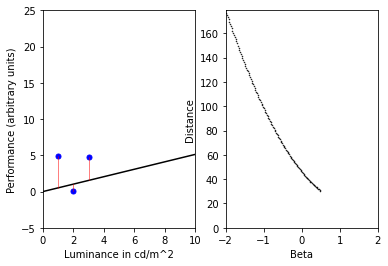

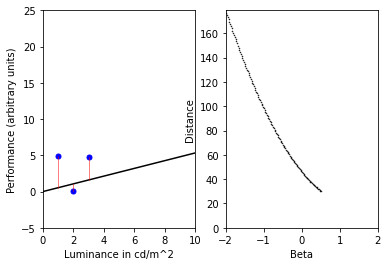

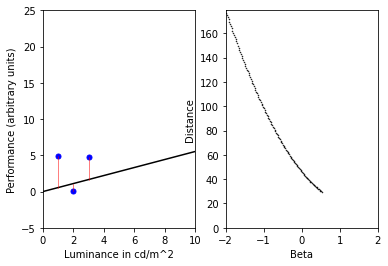

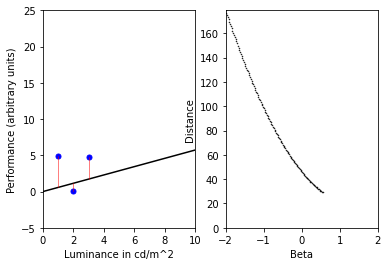

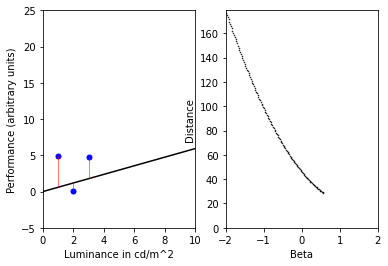

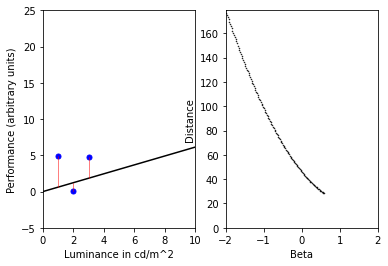

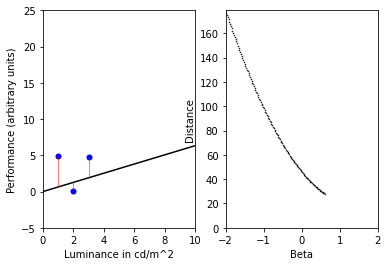

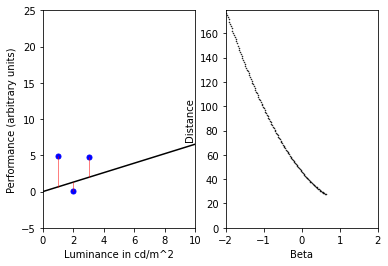

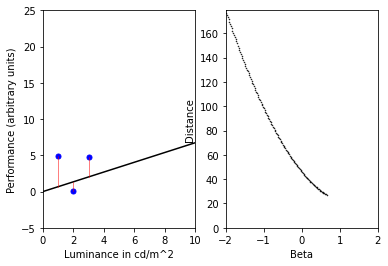

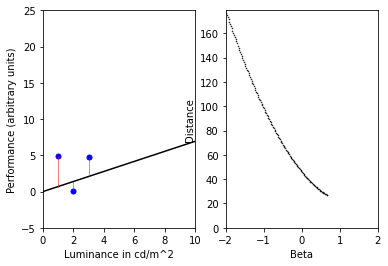

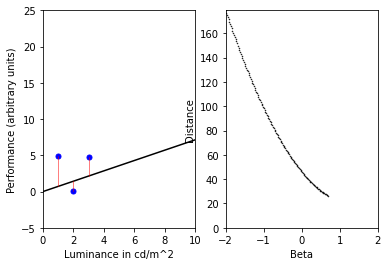

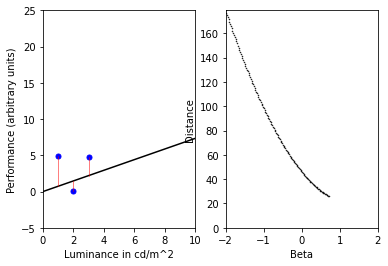

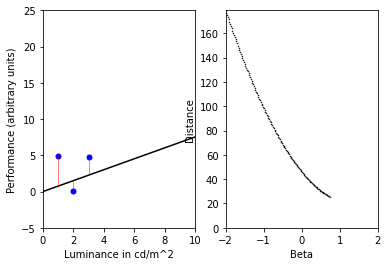

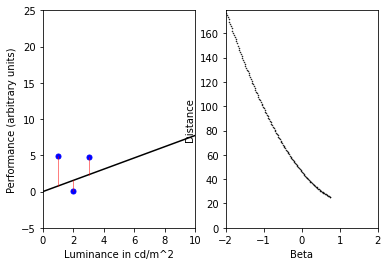

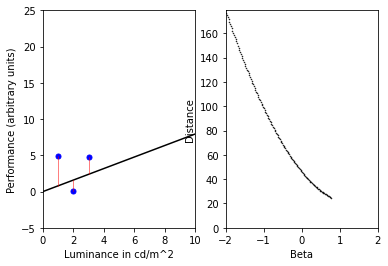

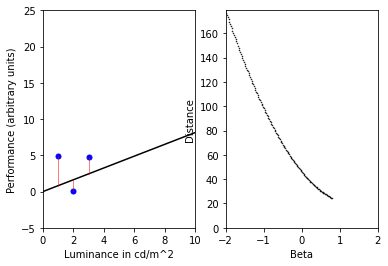

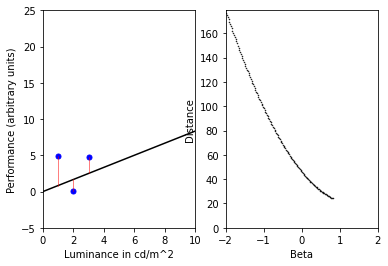

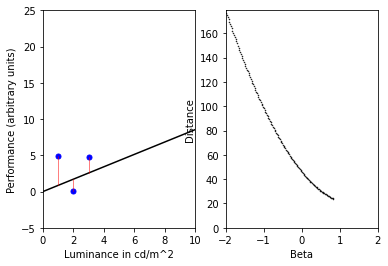

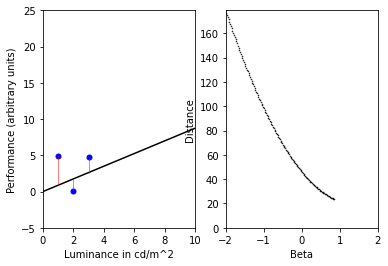

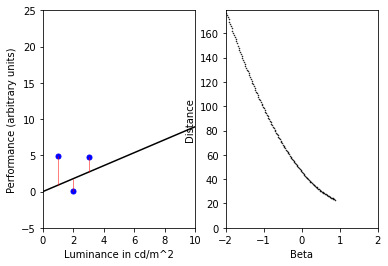

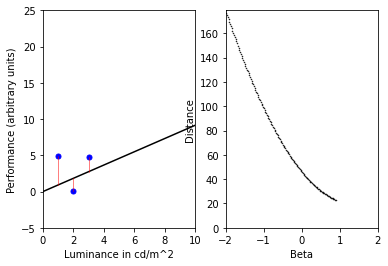

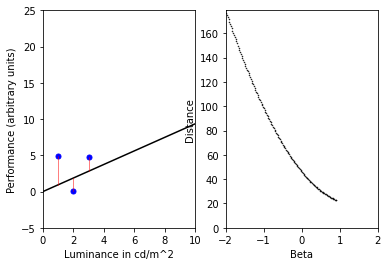

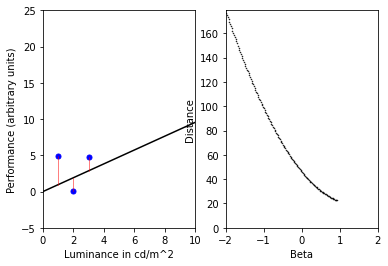

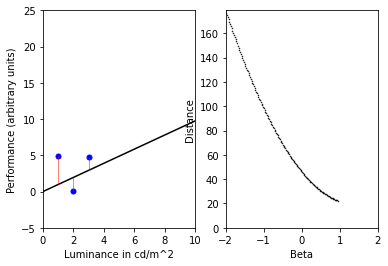

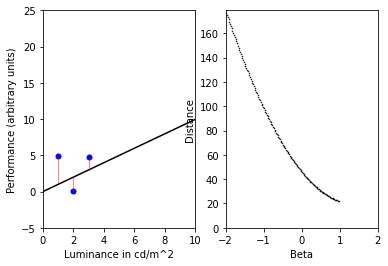

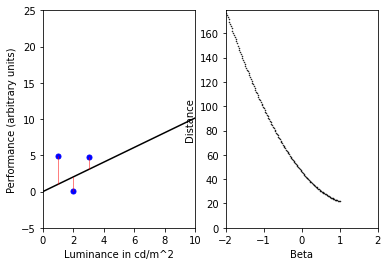

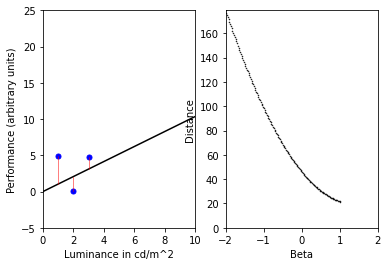

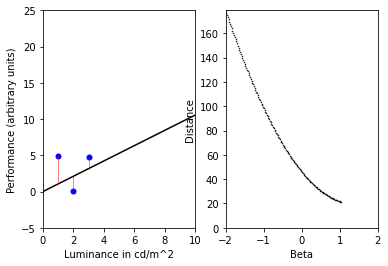

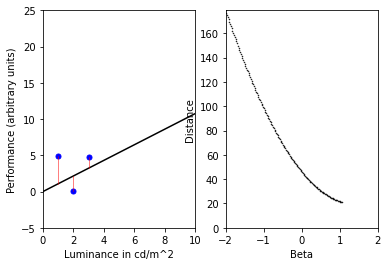

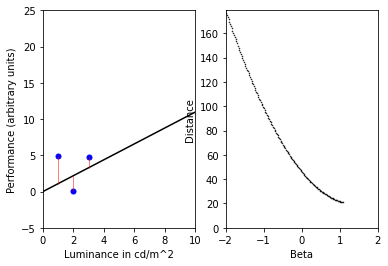

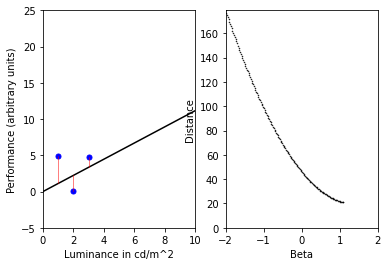

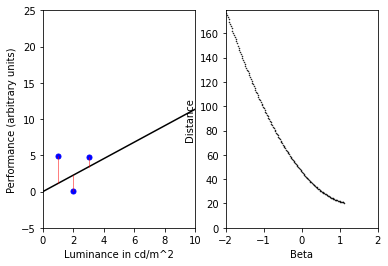

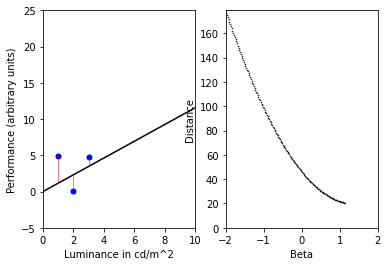

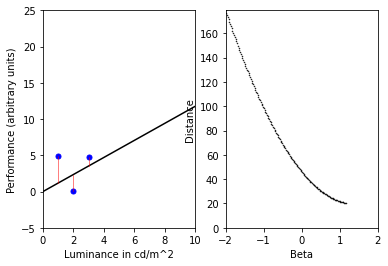

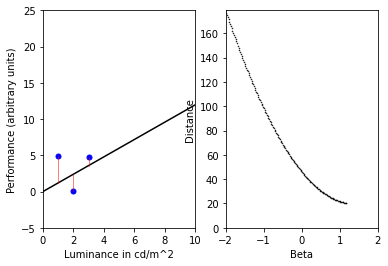

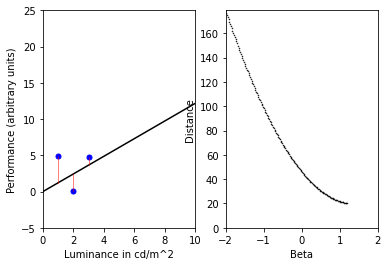

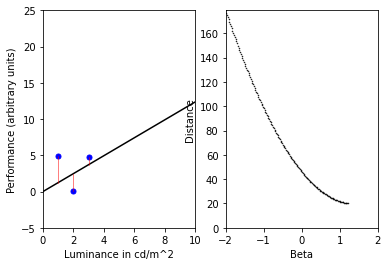

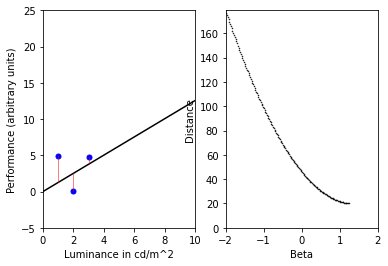

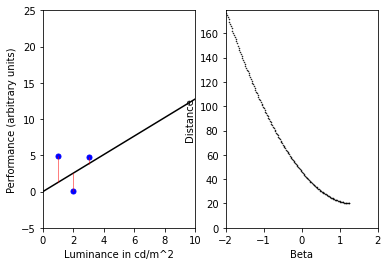

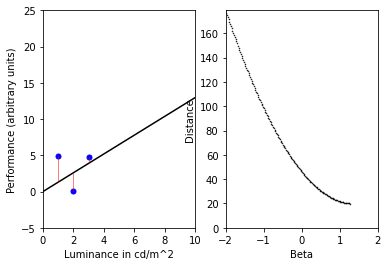

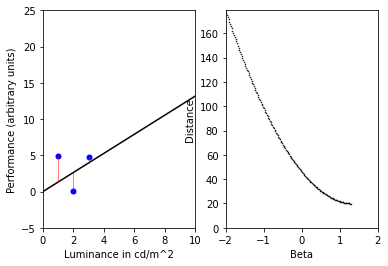

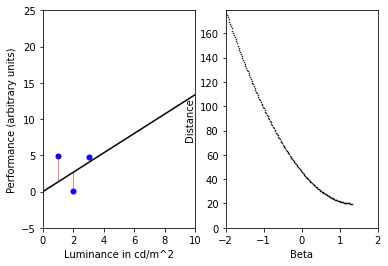

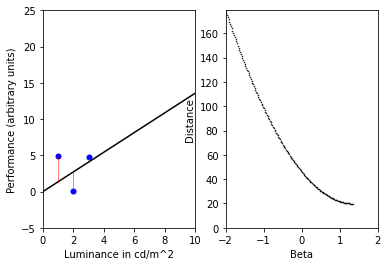

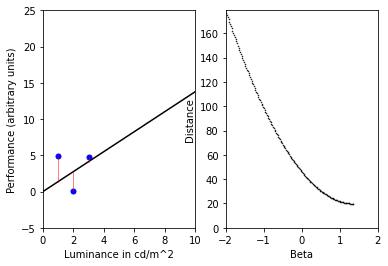

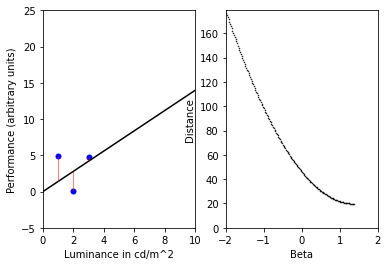

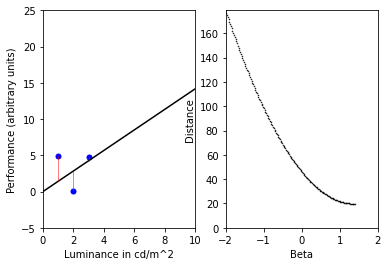

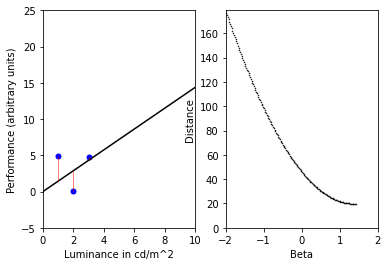

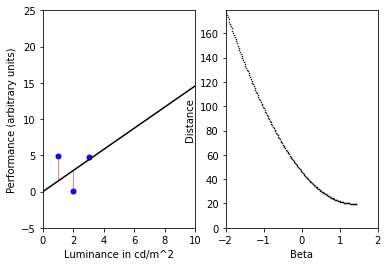

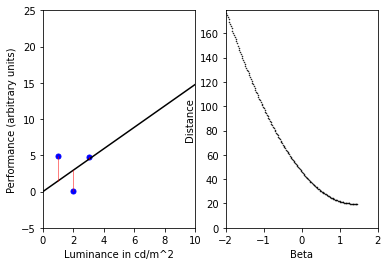

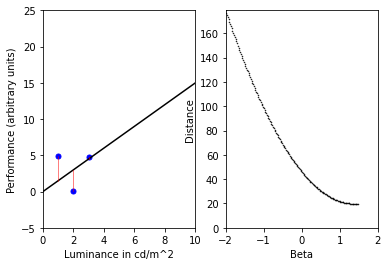

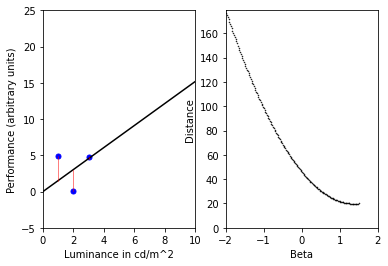

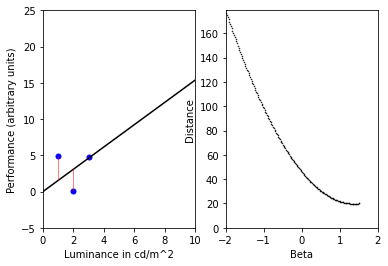

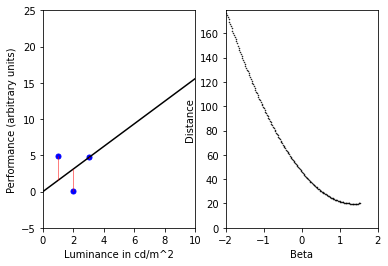

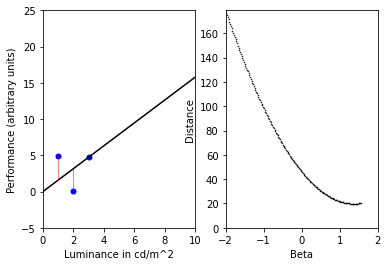

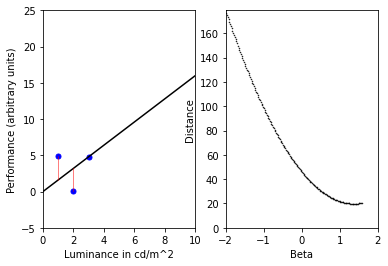

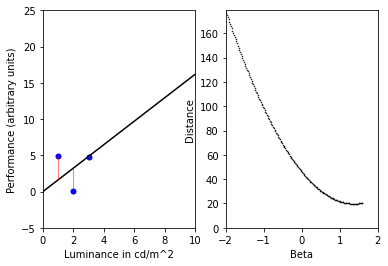

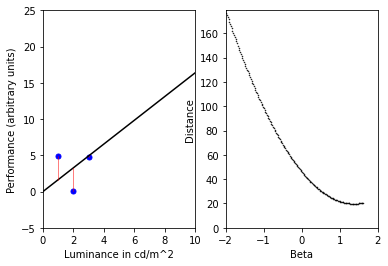

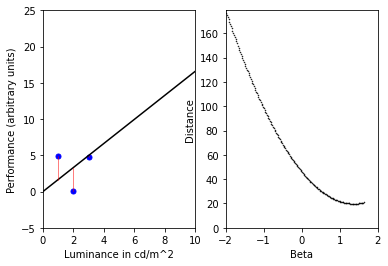

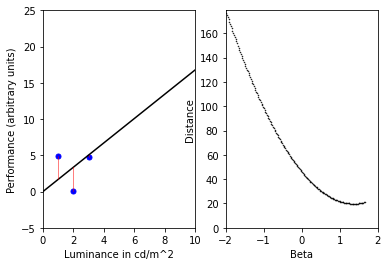

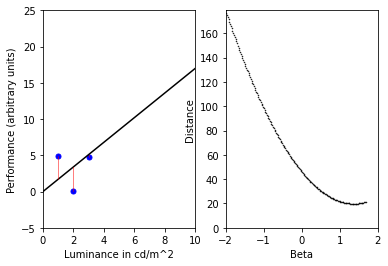

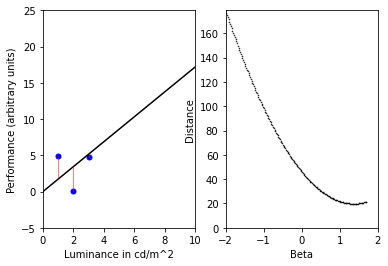

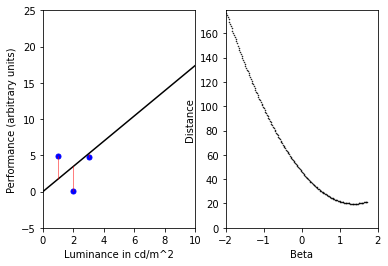

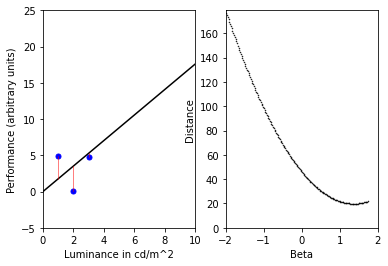

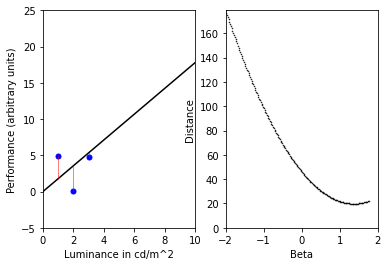

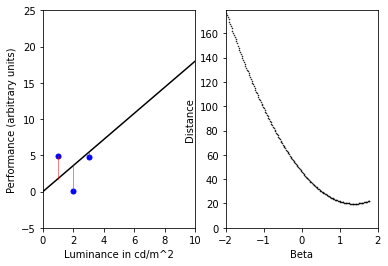

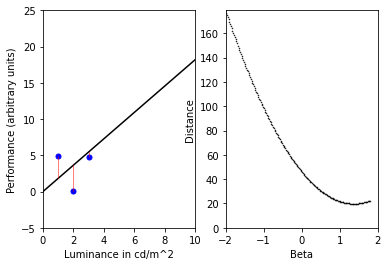

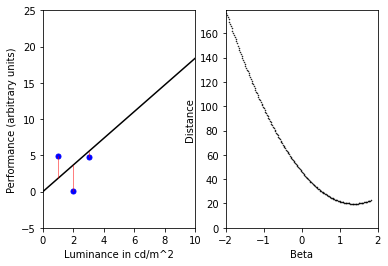

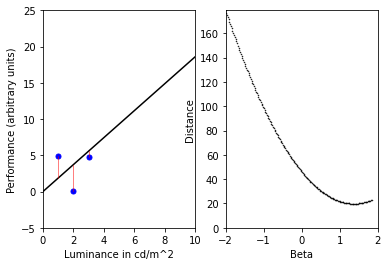

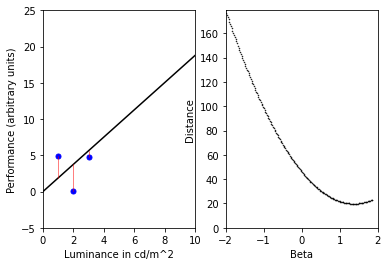

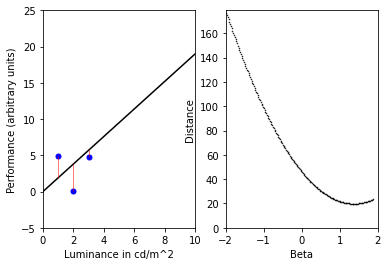

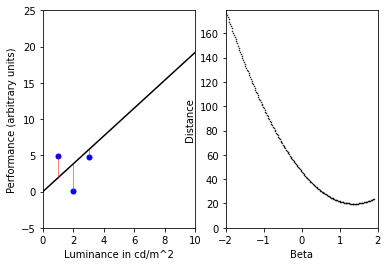

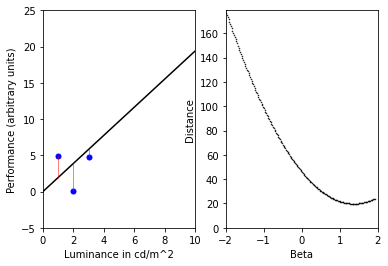

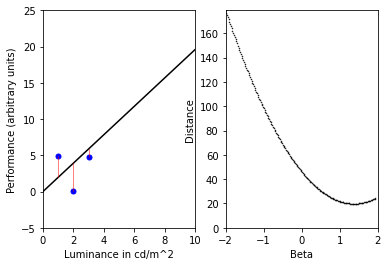

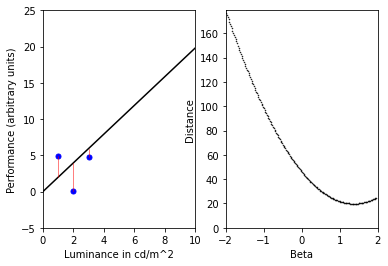

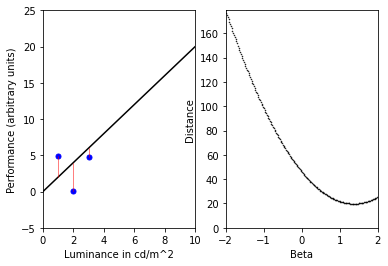

In [5]:
#%% 5) Sweeping the line around, as seen in lecture

for ii in range(numBeta):
    fig = plt.figure() #Open figure, call it fig
    plt.subplot(1,2,1)
    prediction = testBetas[ii]*xLuminance
    plt.plot(xLuminance,yPerformance,'o',markersize=5,color='blue') 
    regressionLineX = np.linspace(0,10,100)
    regressionLineY = testBetas[ii] * regressionLineX
    plt.plot(regressionLineX,regressionLineY,color='black')
    plt.plot([xLuminance,xLuminance],[prediction,yPerformance],linewidth=0.5,color='red')
    plt.xlim(0,10)
    plt.ylim(-5,25)
    plt.xlabel('Luminance in cd/m^2')
    plt.ylabel('Performance (arbitrary units)')
    
    plt.subplot(1,2,2)
    plt.plot(testBetas[0:ii],distanceSum[0:ii,1],'o',markersize=0.5,color='black') 
    plt.xlim(startExploration,endExploration)
    plt.ylim(0,max(distanceSum[:,1]))
    plt.xlabel('Beta')
    plt.ylabel('Distance')
    plt.pause(0.1)

Text(0, 0.5, 'Performance in arbitrary units')

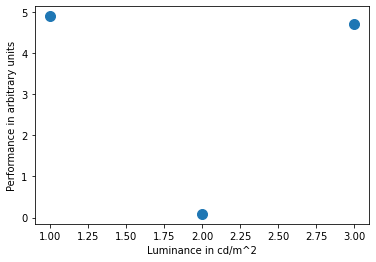

In [6]:
#%% BONUS: Understanding least squares regression from a linear algebra perspective
# [Skip if you don't appreciate LA yet]
#% This is revisiting the lighting and performance cover story from section 3 above
# xLuminance = np.array([1,2,3]) # A column vector of IV in cd/m^2
# yPerformance = 1.5 * xLuminance + 0.5 + np.random.normal(0,1,len(xLuminance)) * 2

# Make a plot of the situation:
plt.plot(xLuminance,yPerformance,'o',markersize=10)
plt.xlabel('Luminance in cd/m^2')
plt.ylabel('Performance in arbitrary units')



Text(0.5, 0, 'Trial 3')

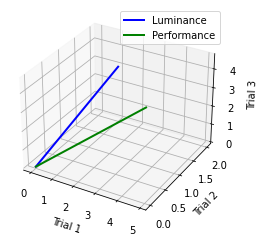

In [7]:
# This is legit, but to see how the equation (which works) works
# let's look at this graphically. Or geometrically.
# To do that, we need to express the experiment visually.
# Now, each trial is a dimension.
# Now what? How do we find the solution?
# Plot the entire experiment of inputs and outputs as vectors 

fig = plt.figure() # init figure
ax = fig.gca(projection='3d') # project into 3d space
ax.plot3D([0,xLuminance[0]],[0,xLuminance[1]],[0,xLuminance[2]],color='blue',linewidth=2) 
ax.plot3D([0,yPerformance[0]],[0,yPerformance[1]],[0,yPerformance[2]],color='green',linewidth=2) 
plt.legend(['Luminance','Performance']) 
ax.set_xlabel('Trial 1') 
ax.set_ylabel('Trial 2') 
ax.set_zlabel('Trial 3') 

Text(0.5, 0, 'Trial 3')

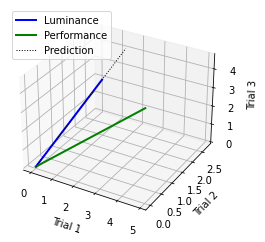

In [8]:
#%% Now, let's actually use the formula we derived
# We use the projection formula to find beta to minimize the distance
# between beta*input and output. Output = beta*input + error

beta = np.dot(yPerformance,xLuminance)/np.dot(xLuminance,xLuminance) # Find the beta
prediction = beta * xLuminance # Make a prediction (simplest possible)

# Add this to the plot - the plot thickens:
fig = plt.figure() # init figure
ax = fig.gca(projection='3d') # project into 3d space
ax.plot3D([0,xLuminance[0]],[0,xLuminance[1]],[0,xLuminance[2]],color='blue',linewidth=2) 
ax.plot3D([0,yPerformance[0]],[0,yPerformance[1]],[0,yPerformance[2]],color='green',linewidth=2) 
ax.plot3D([0,prediction[0]],[0,prediction[1]],[0,prediction[2]],color='black',linewidth=1,linestyle='dotted') 
plt.legend(['Luminance','Performance','Prediction']) 
ax.set_xlabel('Trial 1') 
ax.set_ylabel('Trial 2') 
ax.set_zlabel('Trial 3') 




Text(0.5, 0, 'Trial 3')

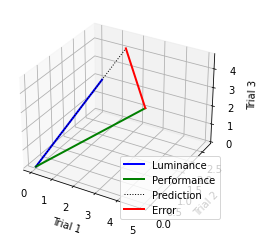

In [9]:
#%% Let's explicitly add the distance between the two (prediction and outcome)

fig = plt.figure() # init figure
ax = fig.gca(projection='3d') # project into 3d space
ax.plot3D([0,xLuminance[0]],[0,xLuminance[1]],[0,xLuminance[2]],color='blue',linewidth=2) 
ax.plot3D([0,yPerformance[0]],[0,yPerformance[1]],[0,yPerformance[2]],color='green',linewidth=2) 
ax.plot3D([0,prediction[0]],[0,prediction[1]],[0,prediction[2]],color='black',linewidth=1,linestyle='dotted')
ax.plot3D([yPerformance[0],prediction[0]],[yPerformance[1],prediction[1]],[yPerformance[2],prediction[2]],color='red',linewidth=2)  
plt.legend(['Luminance','Performance','Prediction','Error']) 
ax.set_xlabel('Trial 1') 
ax.set_ylabel('Trial 2') 
ax.set_zlabel('Trial 3') 



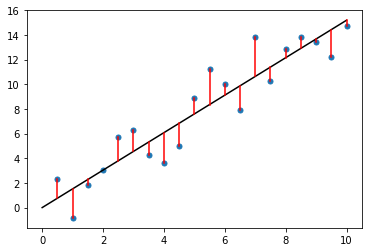

In [11]:
#%% Now that we convinced ourselves that this is in fact the correct beta (geometrically)
# we can go back and plot the solution
# We could open the old figure again, but let's start from scratch
# What if we had 20 measurements (20 trials)?
maxLuminance = 10
xLuminance = np.linspace(0.5,maxLuminance,20) # A column vector of IV in cd/m^2 - 20 luminance values
yPerformance = 1.5 * xLuminance + 0.5 + np.random.normal(0,1,len(xLuminance)) * 2 # Noisy integrate and fire
beta = np.dot(yPerformance,xLuminance)/np.dot(xLuminance,xLuminance) # Find the beta
prediction = beta * xLuminance # Make a prediction (simplest possible)
regressionLineX = np.linspace(0,maxLuminance,10) # Gives us 10 equally spaced numbers between 0 and 10. Intrapolation, x-base
regressionLineY = beta * regressionLineX # Find the ys of the regression line
plt.plot(xLuminance,yPerformance,'o',markersize=5) # Plot the data
plt.plot(regressionLineX,regressionLineY,color='black') # Plot regression line
plt.plot([xLuminance,xLuminance],[prediction,yPerformance],color='red') # Residuals
plt.show()


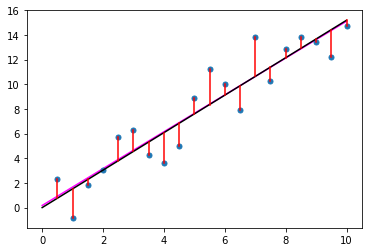

In [13]:
#%% Multiple regression - simplest case: Adding a constant to the regression equation
# Even having more than one predictor makes it a multiple regression, even
# if it is a constant.

# We need to represent the baseline
# We need as many baselines as there are trials, and it always should have
# the same value. Because we assume this is a constant

baseline = np.ones(len(xLuminance))
designMatrix = np.column_stack([xLuminance,baseline])
betas = np.dot(np.linalg.pinv(np.dot(np.transpose(designMatrix),designMatrix)),np.dot(np.transpose(designMatrix),yPerformance.reshape(len(yPerformance),1)))

#%% Let's plot the new regression line on top of the old figure

regressionLineYBar = betas[0]*regressionLineX + betas[1]*np.ones(len(regressionLineX))
plt.plot(regressionLineX,regressionLineYBar,color='magenta')
plt.plot(xLuminance,yPerformance,'o',markersize=5) 
plt.plot(regressionLineX,regressionLineY,color='black') 
plt.plot([xLuminance,xLuminance],[prediction,yPerformance],color='red')
plt.show()